## **Cancer Patient Dataset Visualization Analysis**

**Import Required Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

**Load and Explore the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/cancer patient data sets.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1000, 25)

First 5 rows:
  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \


**Data Preprocessing**

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in Level column:", df['Level'].unique())
print("Value counts for Level:")
print(df['Level'].value_counts())

# Create a copy for visualization
df_viz = df.copy()

# Convert gender to categorical labels for better visualization
df_viz['Gender'] = df_viz['Gender'].map({1: 'Male', 2: 'Female'})

Missing Values:
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Unique values in Level column: ['Low' 'Medium' 'High']
Value counts for Level:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


## **Visualization Analysis**

**Distribution of Cancer Risk Levels (Pie Chart)**

<Figure size 1000x800 with 0 Axes>

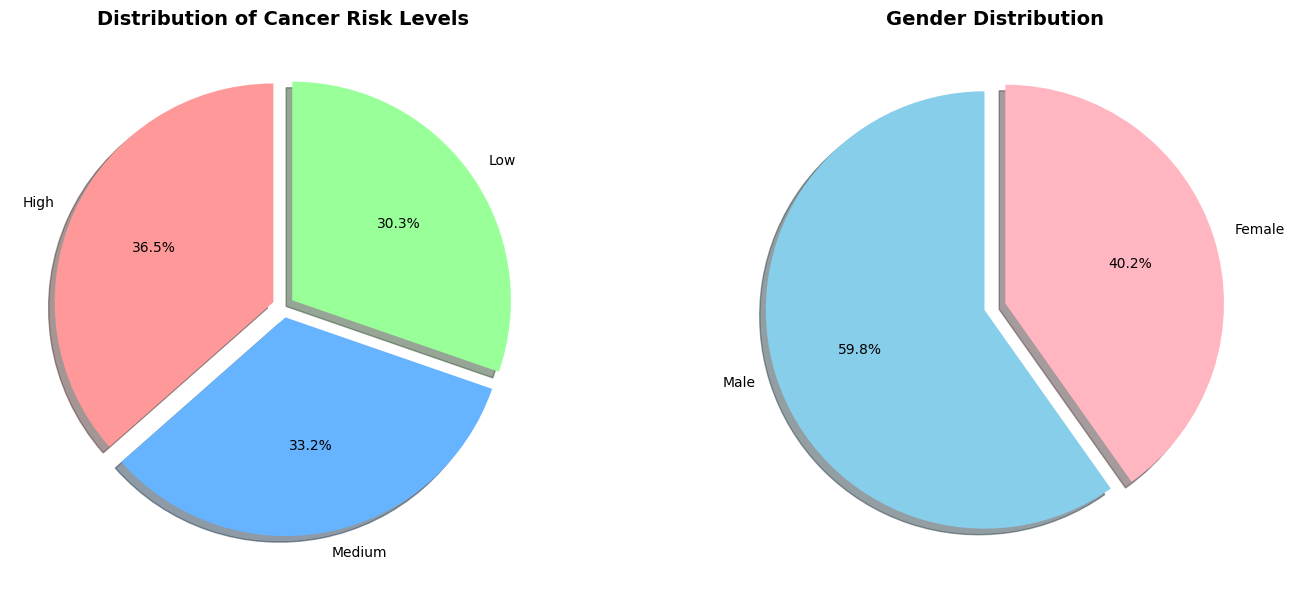

In [4]:
# Create pie chart for cancer risk levels
plt.figure(figsize=(10, 8))

# Create subplot with 2 pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart 1: Risk Level Distribution
level_counts = df['Level'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = ax1.pie(level_counts.values,
                                   labels=level_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=(0.05, 0.05, 0.05),
                                   shadow=True,
                                   startangle=90)
ax1.set_title('Distribution of Cancer Risk Levels', fontsize=14, fontweight='bold')

# Pie chart 2: Gender Distribution
gender_counts = df_viz['Gender'].value_counts()
ax2.pie(gender_counts.values,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['#87CEEB', '#FFB6C1'],
        explode=(0.05, 0.05),
        shadow=True,
        startangle=90)
ax2.set_title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Age Distribution Analysis (Histogram)**

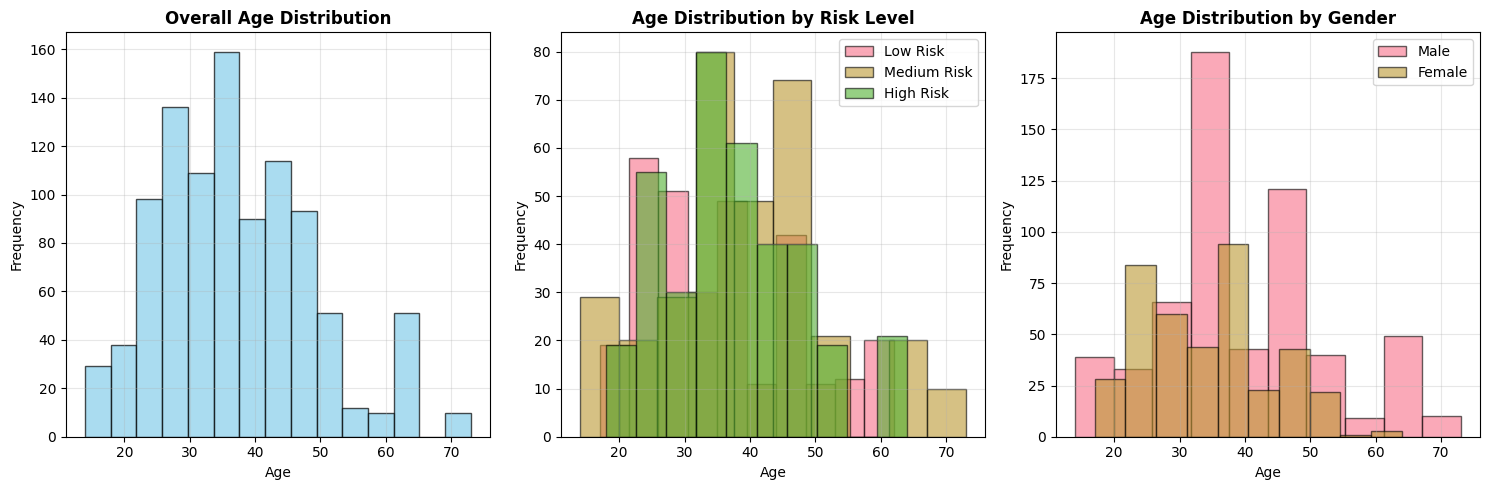

In [5]:
# Age distribution histogram
plt.figure(figsize=(15, 5))

# Subplot 1: Overall age distribution
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Overall Age Distribution', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 2: Age distribution by risk level
plt.subplot(1, 3, 2)
for level in df['Level'].unique():
    level_data = df[df['Level'] == level]['Age']
    plt.hist(level_data, bins=10, alpha=0.6, label=f'{level} Risk', edgecolor='black')
plt.title('Age Distribution by Risk Level', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Age distribution by gender
plt.subplot(1, 3, 3)
for gender in df_viz['Gender'].unique():
    gender_data = df_viz[df_viz['Gender'] == gender]['Age']
    plt.hist(gender_data, bins=10, alpha=0.6, label=gender, edgecolor='black')
plt.title('Age Distribution by Gender', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Risk Factors Analysis (Box and Whisker Plots)**

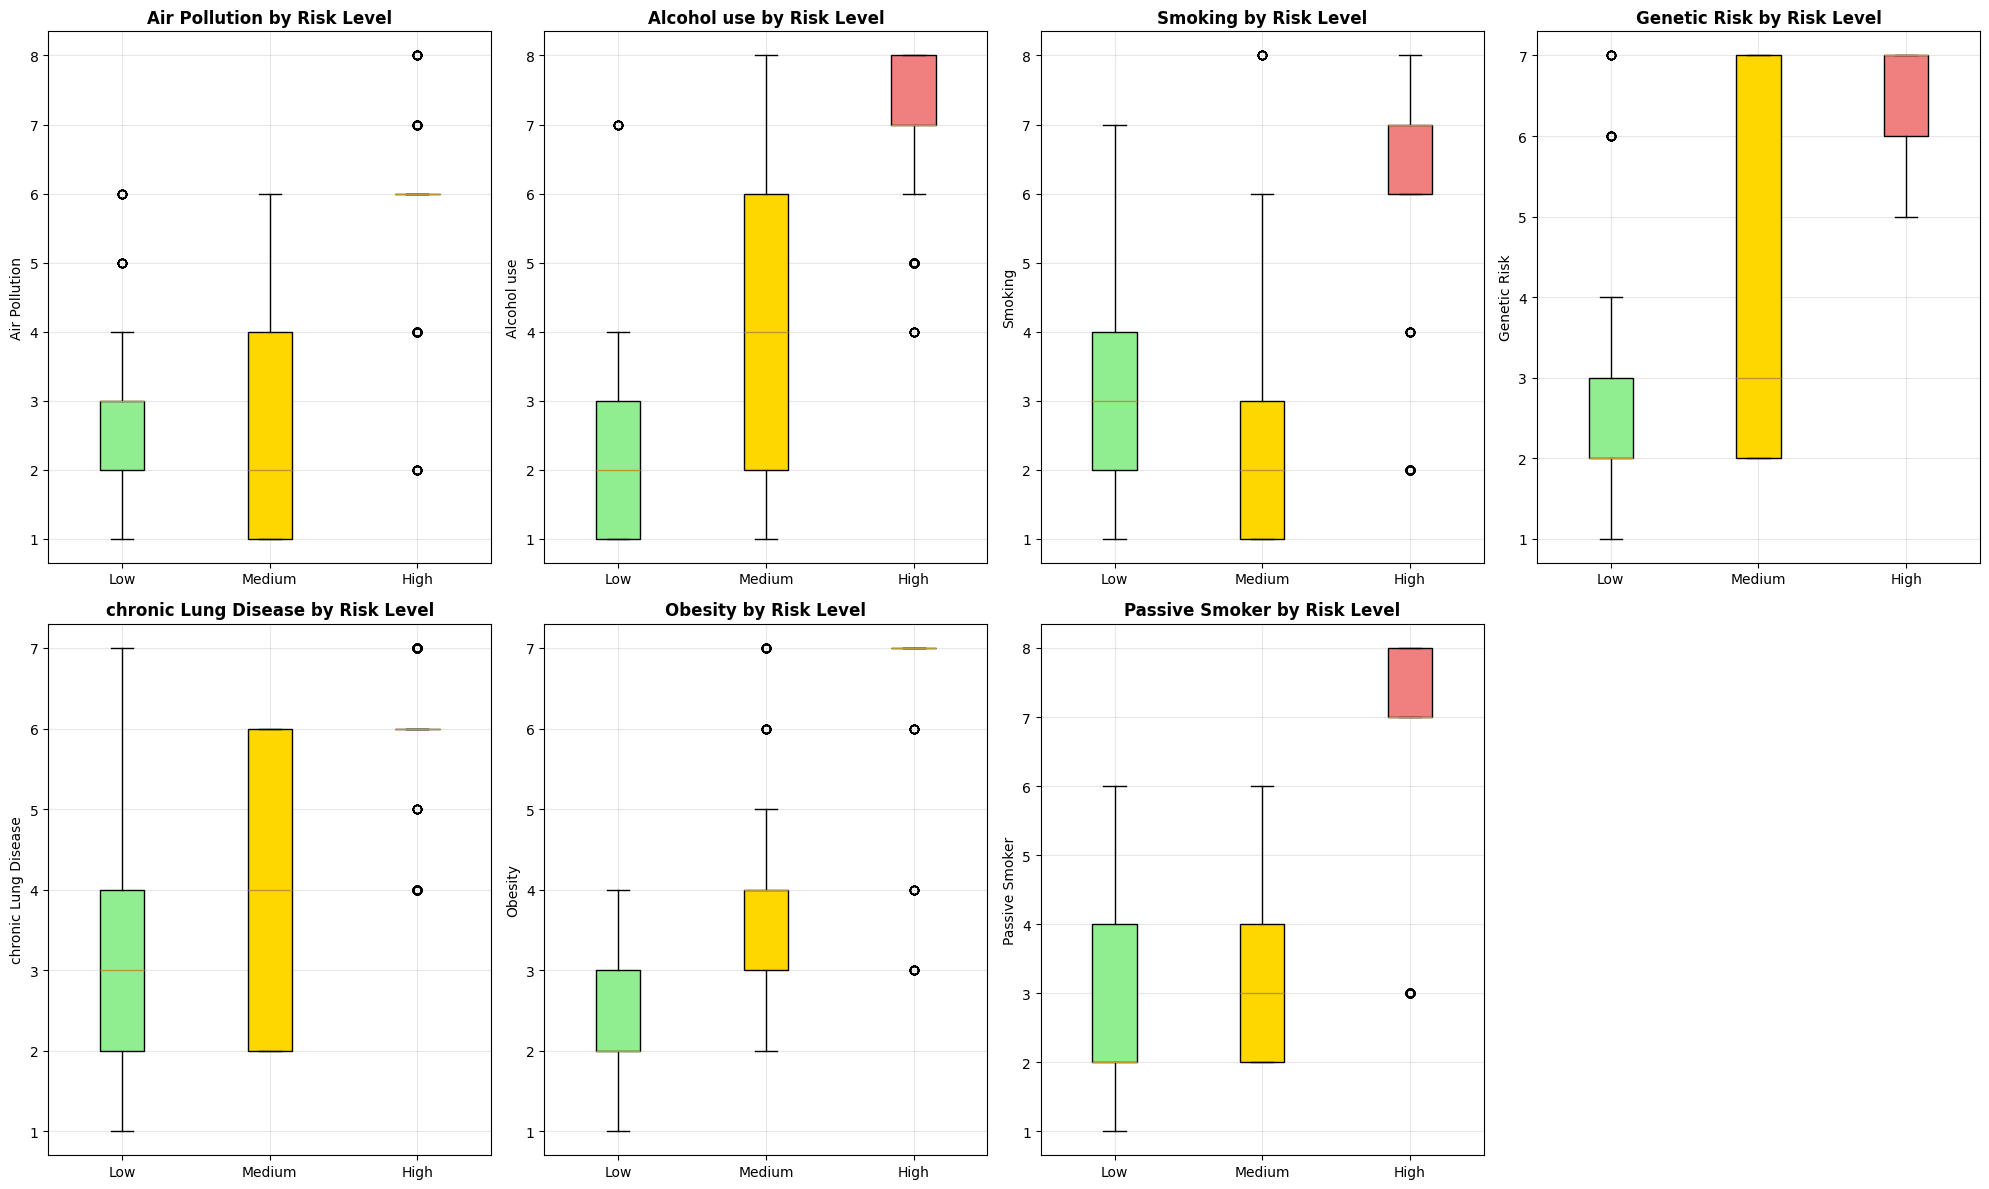

In [6]:
# Box plots for key risk factors
plt.figure(figsize=(20, 12))

# List of key risk factors to analyze
risk_factors = ['Air Pollution', 'Alcohol use', 'Smoking', 'Genetic Risk',
               'chronic Lung Disease', 'Obesity', 'Passive Smoker']

# Create box plots
for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 4, i)

    # Create box plot grouped by risk level
    box_data = [df[df['Level'] == level][factor] for level in ['Low', 'Medium', 'High']]
    box = plt.boxplot(box_data, labels=['Low', 'Medium', 'High'], patch_artist=True)

    # Color the boxes
    colors = ['lightgreen', 'gold', 'lightcoral']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(f'{factor} by Risk Level', fontweight='bold')
    plt.ylabel(factor)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Symptoms Analysis (Line Graph)**

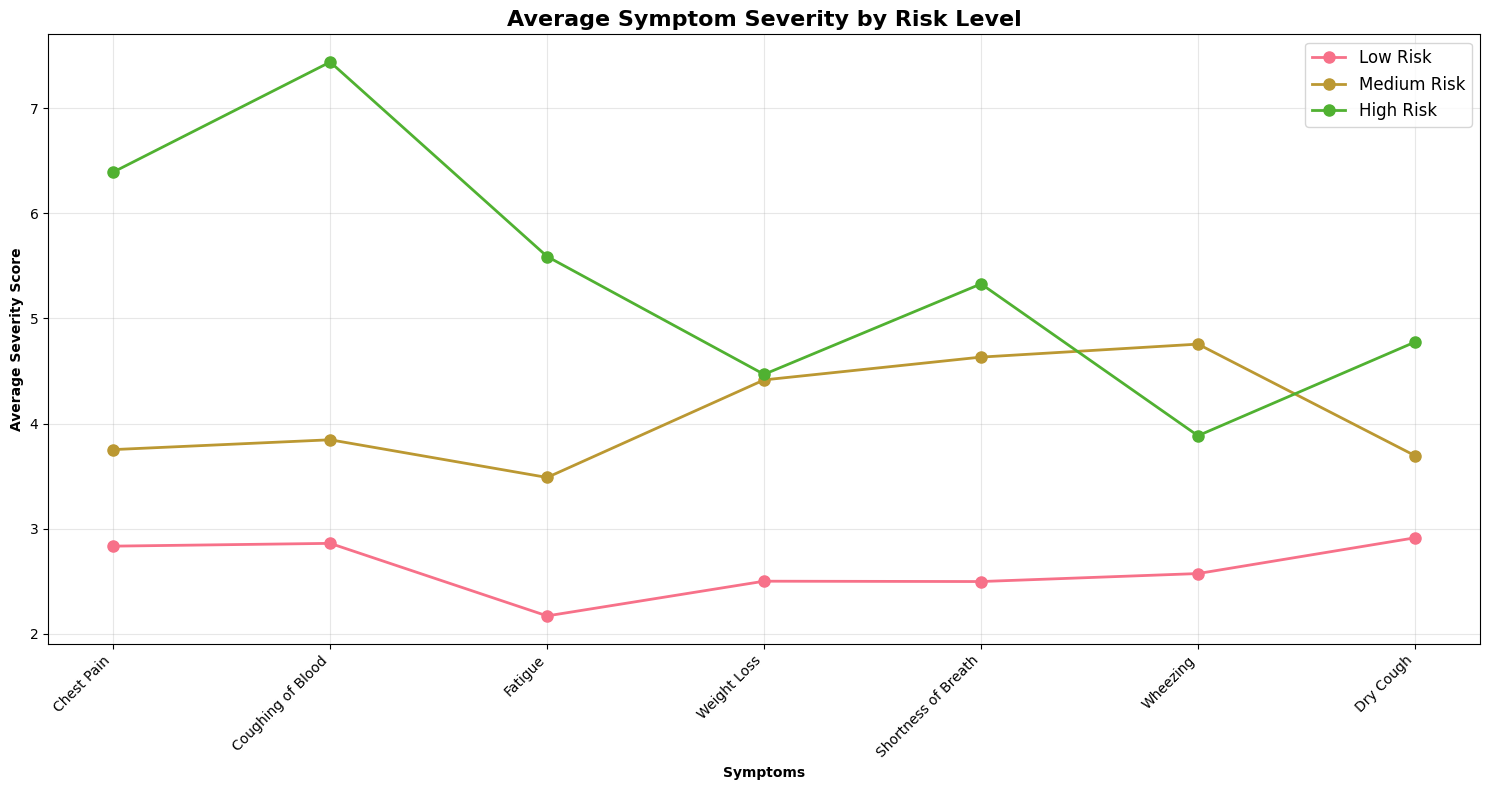

In [7]:
# Line graph showing average symptom severity by risk level
symptoms = ['Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
           'Shortness of Breath', 'Wheezing', 'Dry Cough']

# Calculate average symptom severity for each risk level
symptom_avg = {}
for level in ['Low', 'Medium', 'High']:
    symptom_avg[level] = [df[df['Level'] == level][symptom].mean() for symptom in symptoms]

plt.figure(figsize=(15, 8))

# Plot lines for each risk level
for level in ['Low', 'Medium', 'High']:
    plt.plot(symptoms, symptom_avg[level], marker='o', linewidth=2,
             label=f'{level} Risk', markersize=8)

plt.title('Average Symptom Severity by Risk Level', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms', fontweight='bold')
plt.ylabel('Average Severity Score', fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**3D Scatter Plot**

In [13]:
# 3D scatter plot
fig = px.scatter_3d(df,
                   x='Age',
                   y='Smoking',
                   z='Air Pollution',
                   color='Level',
                   size='Genetic Risk',
                   hover_data=['Patient Id'],
                   title='3D Visualization: Age vs Smoking vs Air Pollution',
                   color_discrete_map={'Low': 'green', 'Medium': 'gold', 'High': 'red'})

fig.update_layout(height=700, width=900)
fig.show()

**Advanced Visualization - Violin Plots**

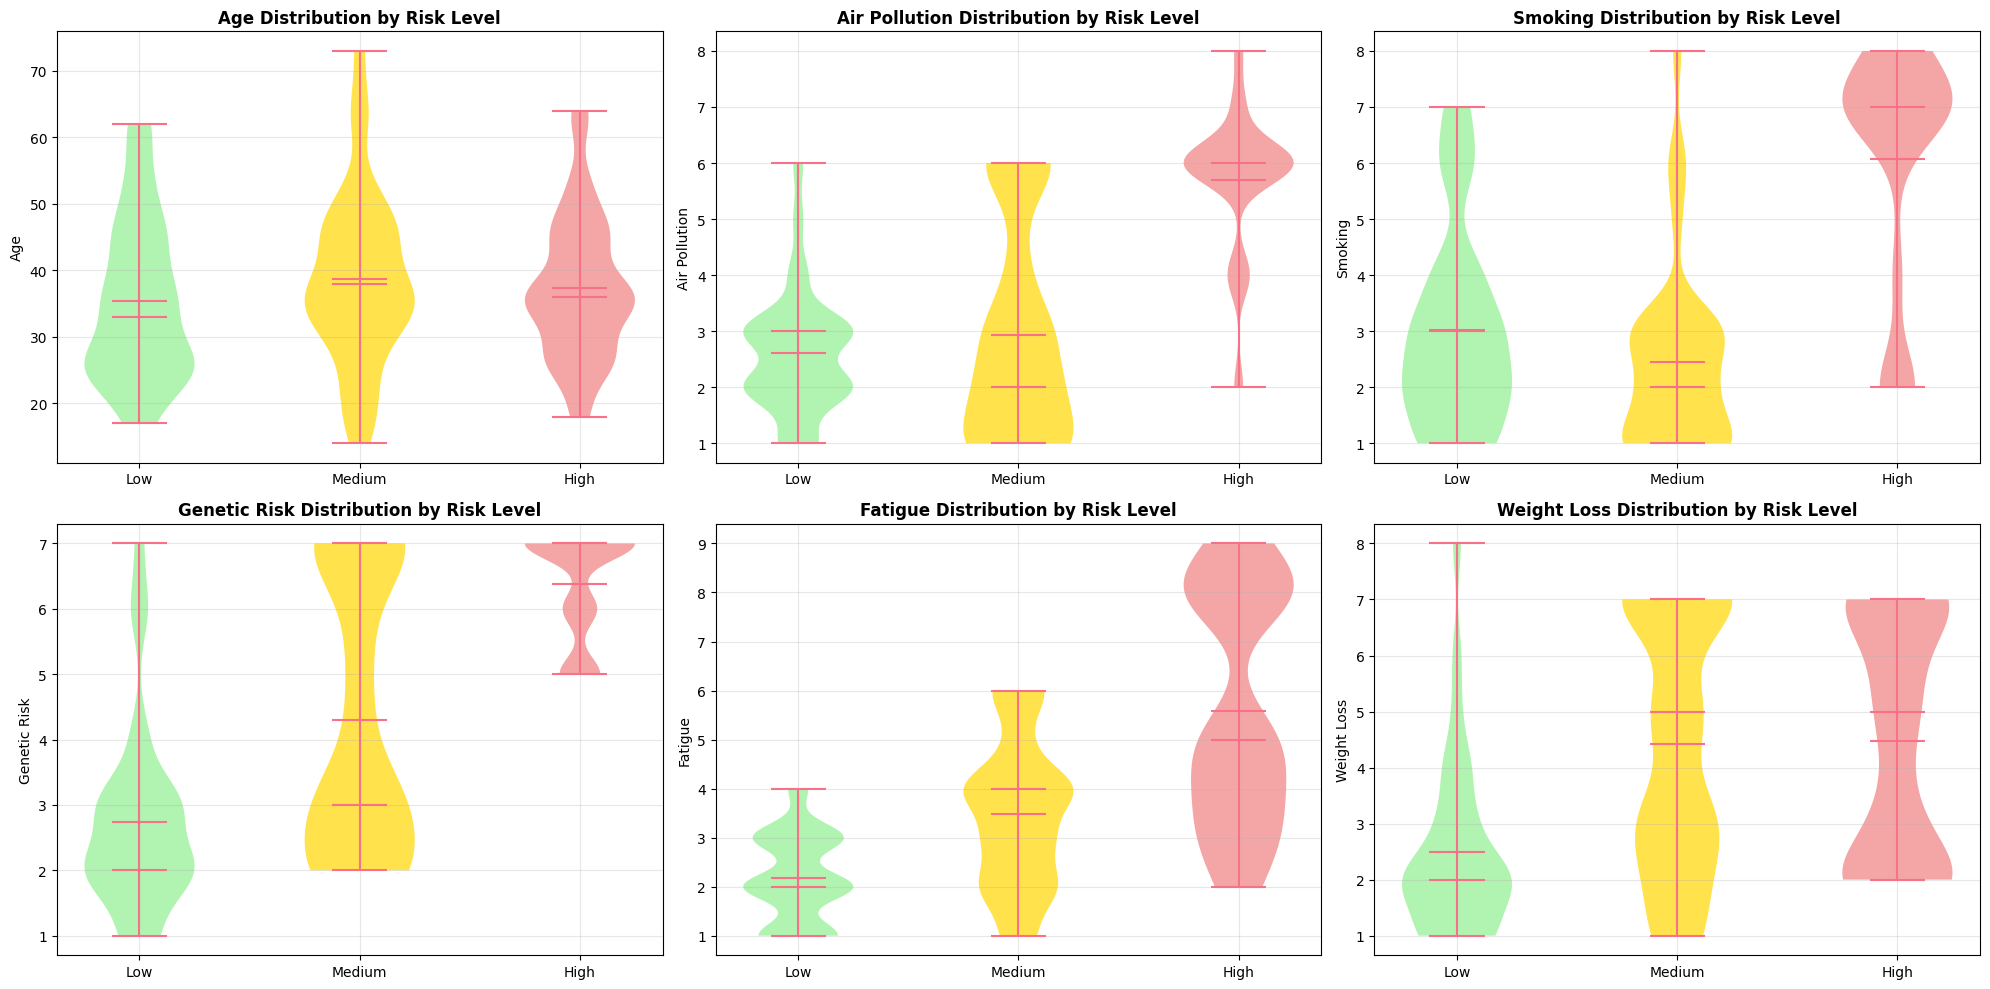

In [14]:
# Violin plots for key factors
plt.figure(figsize=(20, 10))

key_factors = ['Age', 'Air Pollution', 'Smoking', 'Genetic Risk', 'Fatigue', 'Weight Loss']

for i, factor in enumerate(key_factors, 1):
    plt.subplot(2, 3, i)

    # Create violin plot
    data_to_plot = [df[df['Level'] == level][factor] for level in ['Low', 'Medium', 'High']]

    parts = plt.violinplot(data_to_plot, positions=[1, 2, 3], showmeans=True, showmedians=True)

    # Color the violin plots
    colors = ['lightgreen', 'gold', 'lightcoral']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    plt.title(f'{factor} Distribution by Risk Level', fontweight='bold')
    plt.ylabel(factor)
    plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Interactive Plotly Visualizations**

In [15]:
# Interactive scatter plot matrix
import plotly.express as px

# Select key variables for scatter plot matrix
key_vars = ['Age', 'Air Pollution', 'Smoking', 'Genetic Risk', 'Fatigue']
df_plot = df[key_vars + ['Level']].copy()

# Create interactive scatter plot matrix
fig = px.scatter_matrix(df_plot,
                       dimensions=key_vars,
                       color='Level',
                       title='Interactive Scatter Plot Matrix of Key Risk Factors',
                       color_discrete_map={'Low': 'green', 'Medium': 'gold', 'High': 'red'})

fig.update_layout(height=800, width=1000)
fig.show()

**Risk Factor Importance Analysis**

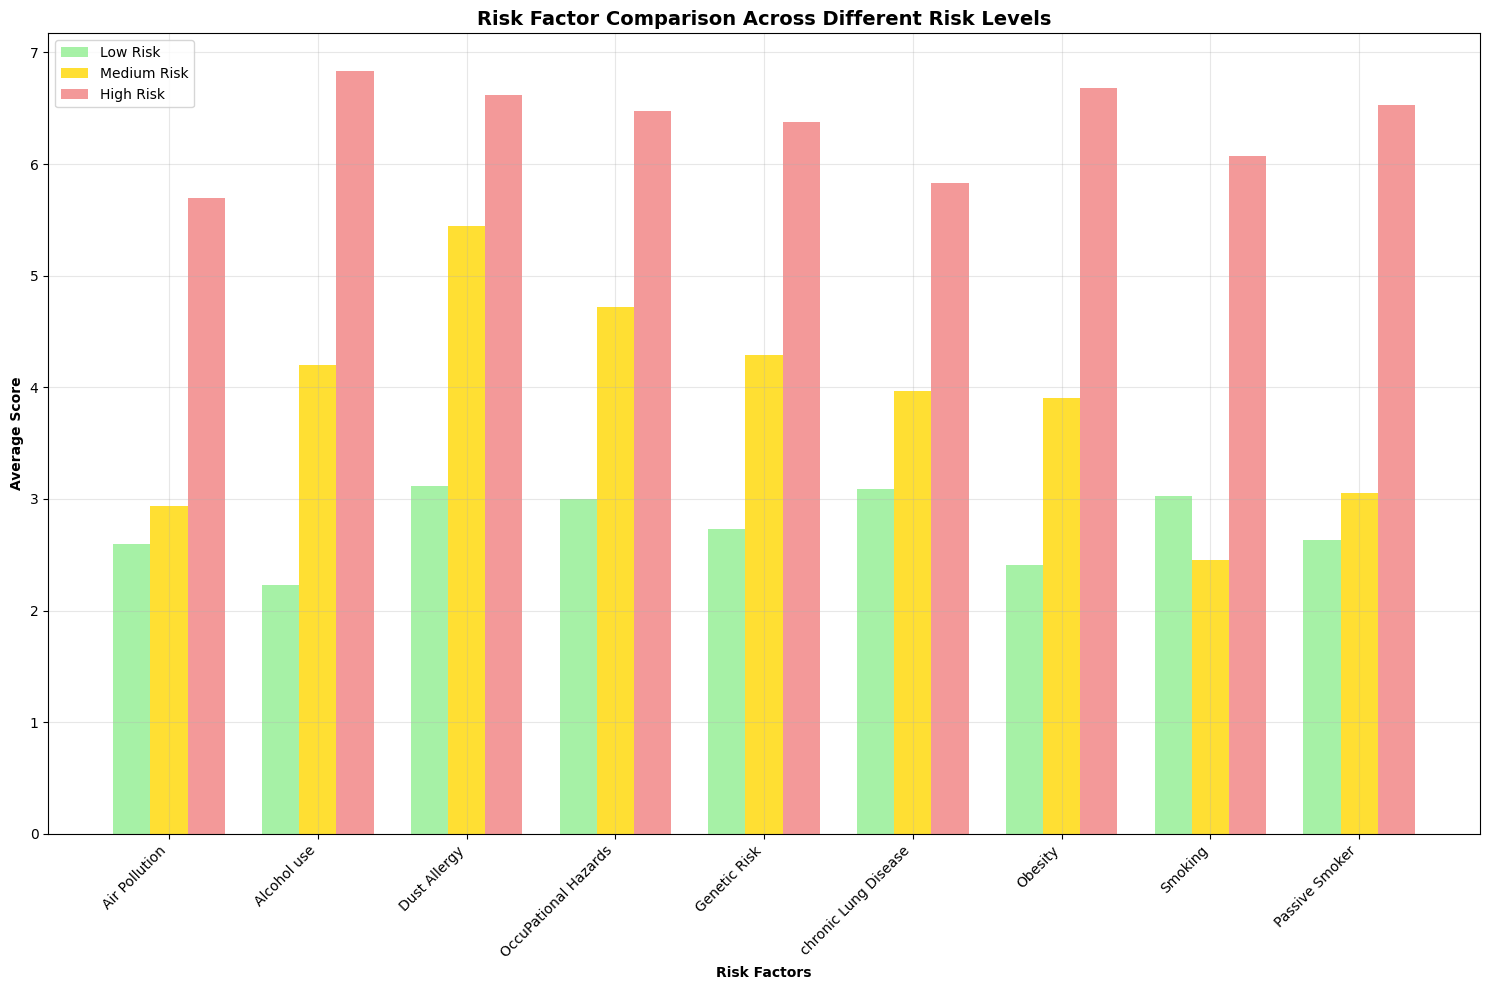

In [16]:
# Calculate average scores for each risk level
risk_factors_analysis = ['Air Pollution', 'Alcohol use', 'Dust Allergy',
                        'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
                        'Obesity', 'Smoking', 'Passive Smoker']

plt.figure(figsize=(15, 10))

# Create a comparative bar plot
x_pos = np.arange(len(risk_factors_analysis))
width = 0.25

low_means = [df[df['Level'] == 'Low'][factor].mean() for factor in risk_factors_analysis]
medium_means = [df[df['Level'] == 'Medium'][factor].mean() for factor in risk_factors_analysis]
high_means = [df[df['Level'] == 'High'][factor].mean() for factor in risk_factors_analysis]

plt.bar(x_pos - width, low_means, width, label='Low Risk', color='lightgreen', alpha=0.8)
plt.bar(x_pos, medium_means, width, label='Medium Risk', color='gold', alpha=0.8)
plt.bar(x_pos + width, high_means, width, label='High Risk', color='lightcoral', alpha=0.8)

plt.xlabel('Risk Factors', fontweight='bold')
plt.ylabel('Average Score', fontweight='bold')
plt.title('Risk Factor Comparison Across Different Risk Levels', fontsize=14, fontweight='bold')
plt.xticks(x_pos, risk_factors_analysis, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()